# ML Assignment 8

**1) Implement the X-NOR of data, train a Neural Network using Back Propagation Algorithm.**


**2) Also explain how you will test the network**

------

####  It will be using the following to make the X-NOR Gate

- AND
- NOR
- OR

#### The X-NOR Model will look like the following:

<img src="https://user-images.githubusercontent.com/66634743/96352445-3c8e4500-10d4-11eb-842b-395a76e9a2d1.png" align="left" width=660 height=400>

<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>


------

### Importing Required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Initializing Data

In [2]:
data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_train_XNOR = np.array([[1], [0], [0], [1]])

n_h = 2
n_x = data.shape[1]
n_y = Y_train_XNOR.shape[1]

np.random.seed(69) # to get a consistant result
W1 = np.random.randn(n_h, n_x)
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(n_y, n_h)
b2 = np.zeros((n_y, 1))

parameters = {"W1" : W1, "b1": b1, "W2" : W2, "b2": b2}

### Functions

In [3]:
def sigmoid(z):
    z = np.array(z)
    
    return (1/ (1 + np.exp(-z)))


def forward_prop(X, Y, parameters):
    m = X.shape[0]
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]
    
    Z1 = np.dot(W1, X.T) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2)
    cost = -1/m * np.sum(Y.T*np.log(A2) + (1 - Y.T)*np.log(1 - A2))
    
    return cost, cache, A2


def backward_prop(X, Y, cache):
    m = X.shape[0]
    (Z1, A1, W1, b1, Z2, A2, W2, b2) = cache
    
    dZ2 = A2 - Y.T
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = np.sum(dZ2, axis = 1, keepdims=True)
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, A1 * (1- A1))
    dW1 = (1/m) * np.dot(dZ1, X)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
    
    gradients = {"dZ2": dZ2, "dW2": dW2, "db2": db2, "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return gradients


def update_parameters(parameters, grads):
    parameters["W1"] -= grads["dW1"]
    parameters["W2"] -= grads["dW2"]
    parameters["b1"] -= grads["db1"]
    parameters["b2"] -= grads["db2"]

    return parameters


def predict(z):
    return (z > 0.5) * 1.0

### Training the NN

In [4]:
epochs = 1000
hist = []

for i in range(epochs):
    J, cache, _ = forward_prop(data, Y_train_XNOR, parameters)
    grads = backward_prop(data, Y_train_XNOR, cache)
    parameters = update_parameters(parameters, grads)
    
    hist.append(J)

### Testing the NN

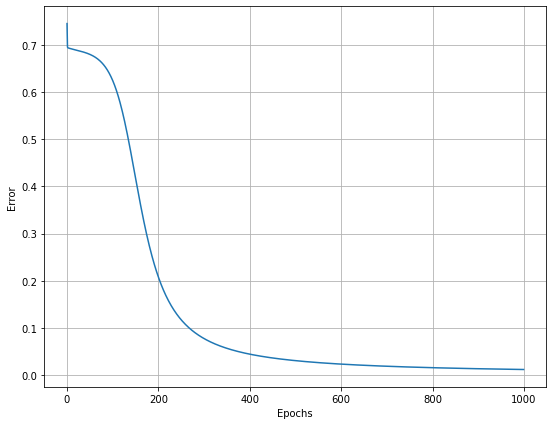

In [5]:
cost, _, A2 = forward_prop(data, Y_train_XNOR, parameters)
pred = predict(A2)

plt.figure(figsize=(9, 7))
plt.grid()
plt.plot(range(epochs), hist)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

In [6]:
print("\n\t    Final Results\n")
print('+-------------+--------+----------+\n|    data     |   A2   |   pred   |\n+-------------+--------+----------+')
for i in range(4):
    print('|', data[i,0], ' XNOR ', data[i,1], ' | ', "{0:.3f}".format(A2[0,i]), '|  ( ~', int(pred[0,i]), ') |')
print('+-------------+--------+----------+')
    


	    Final Results

+-------------+--------+----------+
|    data     |   A2   |   pred   |
+-------------+--------+----------+
| 0  XNOR  0  |  0.988 |  ( ~ 1 ) |
| 0  XNOR  1  |  0.012 |  ( ~ 0 ) |
| 1  XNOR  0  |  0.011 |  ( ~ 0 ) |
| 1  XNOR  1  |  0.990 |  ( ~ 1 ) |
+-------------+--------+----------+
